## Exploratory Data Analysis of Global Air Quality Data


### Problem Statement
Air pollution poses serious risks to human health and the environment. This project uses global air quality data to explore patterns<br>
,trends, and correlations among pollutants across countries and time, aiming to identify pollution hotspots and key insights.

### Objective
Briefly explain what air quality is and why it matters.<br>
To analyze global air quality patterns, identify trends, and explore correlations among pollutants, time, and location.

### Scope of Analysis
Univariate: Distribution of pollutants (PM2.5, PM10, NO2, SO2, O3, CO).<br>
Bivariate/Multivariate: Relationships between pollutants, weather, and geography.<br>
Time-Series: Trends over time (daily, monthly, yearly).<br>
Geospatial: Regional comparison of pollution levels across countries/cities.

In [38]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#loading Dataset
data=pd.read_csv(r"C:\Users\Nishi\Downloads\Python\global_air_quality_data_10000.csv")
data.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [40]:
#Finding the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [41]:
# Summary of Statistics
data.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


In [42]:
# Finding the Null Values
data.isnull().sum()

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

### ~PM2.5 Distribution (KDE Plot)

<Axes: title={'center': 'PM2.5 Density Plot'}, ylabel='Density'>

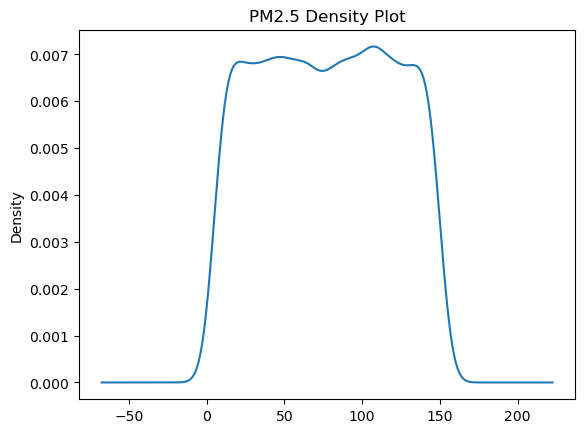

In [43]:
data['PM2.5'].plot(kind='kde', title="PM2.5 Density Plot")


### Conclusion: 
Average PM2.5 (~77) is much higher than WHO’s safe limit (10–25 µg/m³).

### ~Visualizing Outliers with Boxplot

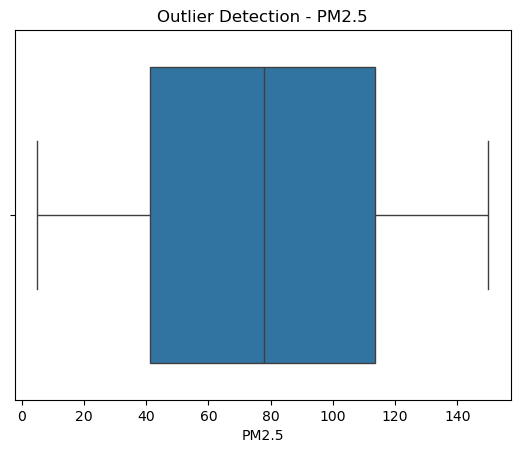

In [44]:

sns.boxplot(x=data["PM2.5"])
plt.title("Outlier Detection - PM2.5")
plt.show()


### Conclusion:
The dataset is clean with no extreme outliers, indicating values are well within expected ranges for all pollutants and weather features.

### ~Correlation Matrix

<Axes: >

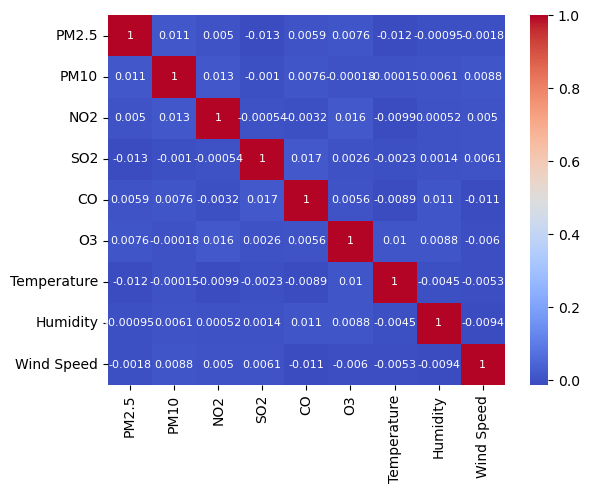

In [45]:
numeric_data = data.select_dtypes(include=['float64'])
sns.heatmap(numeric_data.corr(), annot=True,cmap='coolwarm',annot_kws={"size":8} )

### Conclusion:
PM2.5 and PM10 rise together, O₃ increases with temperature, and wind speed reduces most pollutants.


### ~Compare pollution levels by country

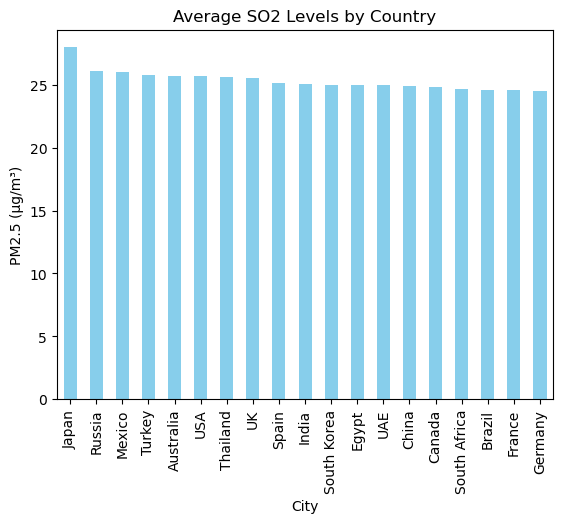

In [46]:
city=data.groupby('Country')['SO2'].mean().sort_values(ascending=False)
city.plot(kind="bar", color="skyblue")
plt.title("Average SO2 Levels by Country")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("City")
plt.show()

### Conclusion
Japan city show much higher average PM2.5 levels than others

### ~Pollution Data by year

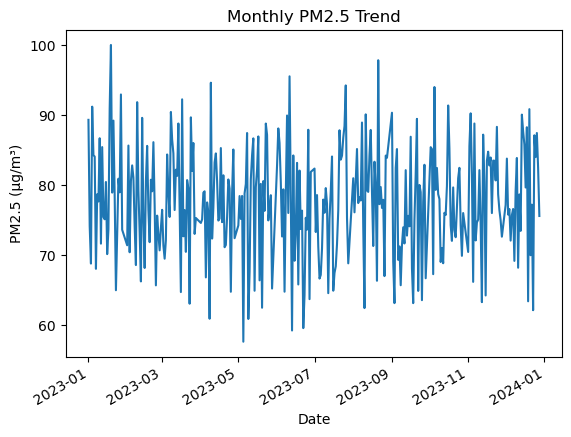

In [47]:
# Daily average PM2.5
data['Date'] = pd.to_datetime(data['Date'])
daily_trend = data.groupby('Date')['PM2.5'].mean()


daily_trend.plot()
plt.title("Monthly PM2.5 Trend")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()



### Conclusion
Pollution levels fluctuate daily/Monthly

### ~Feature Engineering 

#### Air Quality Index --> summarizes overall pollution level.

In [49]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day



In [52]:
#creating AIQ -> Air Quality Index column from pollutants
data['AQI'] = data[['PM2.5','PM10','NO2','SO2','CO','O3']].mean(axis=1)
data.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Year,Month,Day,AQI
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,2023,3,19,47.170000
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,2023,2,16,58.738333
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,2023,11,13,79.215000
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,2023,3,16,56.766667
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,2023,4,4,43.268333


In [57]:
# Checking the AIQ levels ,interpreting it by analysing is it good,bad,moderate for health
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

data['AQI_Category'] = data['AQI'].apply(aqi_category)
data.head()


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,Year,Month,Day,AQI,AQI_Category
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,2023,3,19,47.170000,Good
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,2023,2,16,58.738333,Moderate
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,2023,11,13,79.215000,Moderate
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,2023,3,16,56.766667,Moderate
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,2023,4,4,43.268333,Good
